In [1]:
import os
from abcli import file
from openai_cli import NAME, VERSION
from openai_cli.completion.functions import complete_prompt
from openai_cli.completion.classes import ai_function
import matplotlib.pyplot as plt
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"using {NAME}-{VERSION}.")

using openai_cli-2.88.1.


In [2]:
input_image = file.load_image(
    os.path.join(
        os.getenv("HOME",""),
        "git/blue-bracket/images/portal-34.jpg")
        )[1]

In [3]:
func = ai_function(
    inputs = ["an image as a numpy array"],
    returns = ["a darker version of the input image as a numpy array"],
    requirements = [
        "does not run a for loop on the pixels",
        "uses numpy vector functions",
        "imports all modules that are used in the code"
    ],
    output_class_name="ndarray",
    verbose=False,
)

ai_function.prompt=Write a python function named ai_function_21948096
that inputs an image as a numpy array
and does not run a for loop on the pixels and
uses numpy vector functions and
imports all modules that are used in the code
and returns a darker version of the input image as a numpy array.


In [4]:
assert func.generate(validation_input = input_image)

message='Request to OpenAI API' method=post path=https://api.openai.com/v1/completions
message='OpenAI API response' path=https://api.openai.com/v1/completions processing_ms=13200 request_id=35c5a0364c5ddebcd292b67a79b10d70 response_code=200
openai-cli.complete(): finish_reason: stop.
code: 

import numpy as np
import cv2

def ai_function_21948096(img):
    """
    Inputs image as a numpy array and returns a darker version of the image as a numpy array.
    Does not run a for loop on the pixels and uses numpy vector functions.
    """
    # convert input image to HSV colour space
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # use vectorized functions to darken the image
    hue, saturation, value = cv2.split(img_hsv)
    value[value > 50] -= 50
    value = np.clip(value, 0, 255)

    # create output image and convert to BGR colour space
    img_out = cv2.merge([hue, saturation, value])
    img_out = cv2.cvtColor(img_out, cv2.COLOR_HSV2BGR)

    return img_out
func_ai.compute

In [5]:

image_output = func.compute(input_image)
assert image_output is not None

func_ai.compute(ndarray)
-> ndarray


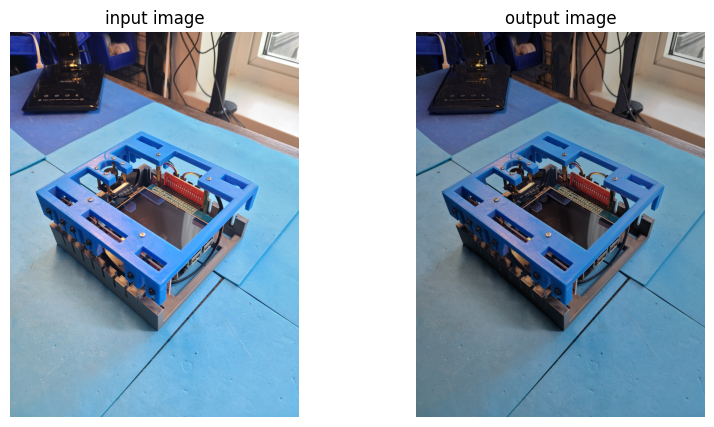

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(input_image)
axes[0].axis('off') 
axes[0].set_title("input image")

axes[1].imshow(image_output)
axes[1].axis('off')
axes[1].set_title("output image")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1)
plt.show()

In [7]:
# END